# Importing the libraries

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing, model_selection
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization, ReLU
from keras import regularizers, optimizers
from tensorflow.keras.optimizers import Adagrad
from keras.metrics import categorical_crossentropy
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Loading and Preprocessing the data

In [2]:
Data = pd.read_csv('dataset IV.csv')
Data.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [3]:
Data.pop('Unnamed: 32')
x = Data.copy()
x.pop('id')
x.pop('diagnosis')
x = np.array(x)
y = np.array(Data['diagnosis'])
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [4]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = model_selection.train_test_split(x_test, y_test, test_size=0.5, random_state=40)

In [5]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_val = sc.transform(x_val)

# Implementing the model and training it

In [6]:
model = tf.keras.models.Sequential()
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.2))
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dense(1, activation='sigmoid'))

In [7]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.00001,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [8]:
model.compile(Adagrad(learning_rate=lr_schedule), loss=['binary_crossentropy'], metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 1000, validation_data=(x_val, y_val))

Epoch 1/1000
4/4 [==============================] - 3s 70ms/step - loss: 0.5718 - accuracy: 0.7582 - val_loss: 0.4996 - val_accuracy: 0.8772
Epoch 2/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5850 - accuracy: 0.7297 - val_loss: 0.4995 - val_accuracy: 0.8772
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5773 - accuracy: 0.7253 - val_loss: 0.4996 - val_accuracy: 0.8772
Epoch 4/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5729 - accuracy: 0.7297 - val_loss: 0.4996 - val_accuracy: 0.8772
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5770 - accuracy: 0.7429 - val_loss: 0.4997 - val_accuracy: 0.8772
Epoch 6/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5701 - accuracy: 0.7538 - val_loss: 0.4994 - val_accuracy: 0.8772
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5706 - accuracy: 0.7363 - val_loss: 0.4996 - val_accuracy: 0.8772
Epoch 8/1000


# Evaluation

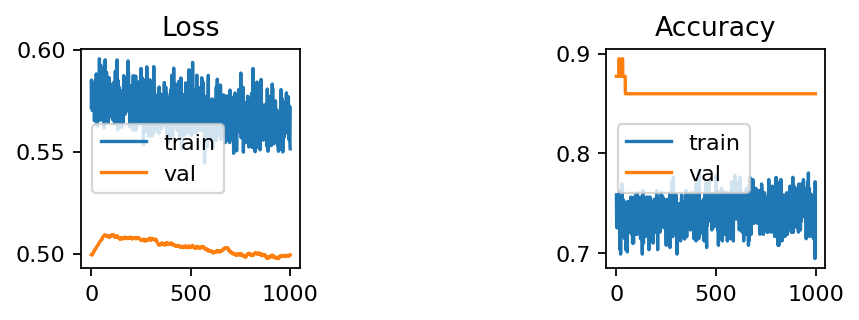

In [10]:
plt.figure(dpi=160)

plt.subplot(231)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

plt.subplot(233)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [11]:
y_hat = model.predict(x_test)

2/2 [==============================] - 0s 4ms/step


In [12]:
y_hat[y_hat>=0.5] = 1
y_hat[y_hat<0.5] = 0


For Test Set
F1 score:  0.7719298245614035
Accuracy:  0.7719298245614035
Precision:  0.7719298245614035
Recall:  0.7719298245614035
Confusion Matrix: 



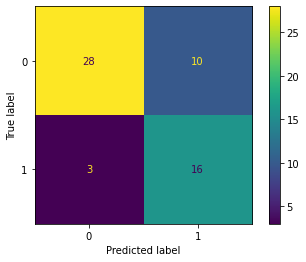

In [13]:
print('\nFor Test Set')
f1 = f1_score(y_test, y_hat, average='micro')
print('F1 score: ' , f1)

accuracy = accuracy_score(y_test, y_hat)
print('Accuracy: ' , accuracy)

precision = precision_score(y_test, y_hat, average='micro')
print('Precision: ' , precision)

recall = recall_score(y_test, y_hat, average='micro')
print('Recall: ' , recall)

matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat))
print('Confusion Matrix: \n')
matrix.plot()
plt.show()